In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 16

df = pd.read_csv('data/importations_numbered_with_seq_num.tsv', sep='\t')

source_patterns = {}
for source in df['source_file'].unique():
    source_data = df[df['source_file'] == source]
    pattern = '_'.join([f"{row['importation_order']}-{row['sequence_num']}" 
                       for _, row in source_data.sort_values('importation_order').iterrows()])
    source_patterns[source] = pattern

pattern_counts = pd.Series(source_patterns).value_counts().reset_index()
pattern_counts.columns = ['pattern', 'count']

total = pattern_counts['count'].sum()
pattern_counts['percentage'] = (pattern_counts['count'] / total * 100).round(2)

top_patterns = pattern_counts.head(10)

for idx, row in top_patterns.iterrows():
    print(f"\nPattern {idx+1}: {row['count']} files ({row['percentage']}%)")
    print("Sequence: " + row['pattern'])

print(f"\nTotal {len(pattern_counts)} unique pattern types")

plt.figure(figsize=(6, 6))

sizes = list(top_patterns['count'])
labels = [f"Pattern {i+1}" for i in range(len(top_patterns))]
others_count = total - sum(sizes)
sizes.append(others_count)

custom_colors = [
    '#43978F', '#9EC4BE', '#ABD0F1', '#DCE9F4', '#E56F5E',
    '#F19685', '#F6C957', '#CCCCCC', '#DDDDDD', '#EEEEEE', '#AAAAAA'
]

def autopct_func(pct):
    absolute = int(pct/100.*sum(sizes))
    cumsum = 0
    for i, size in enumerate(sizes):
        cumsum += size
        if absolute <= cumsum:
            if i < 4:
                return f'{pct:.1f}%'
            break
    return ''

plt.pie(
    sizes,
    labels=None,
    autopct=autopct_func,
    startangle=90,
    colors=custom_colors,
    textprops={'fontsize': 24}
)

plt.axis('equal')
plt.title('Distribution of Source File Patterns', pad=20)
plt.tight_layout()
plt.savefig('fig/fig_6.pdf', dpi=1000, bbox_inches='tight')
plt.savefig('fig/fig_6.svg', format='svg', bbox_inches='tight')
plt.show()

with open('data/pattern_details.txt', 'w') as f:
    for idx, row in top_patterns.head(7).iterrows():
        pattern_str = row['pattern'].replace('_', ', ')
        f.write(f"Pattern {idx+1}: {pattern_str} ({row['percentage']}%)\n")


/tmp/ipykernel_893042/3518305620.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


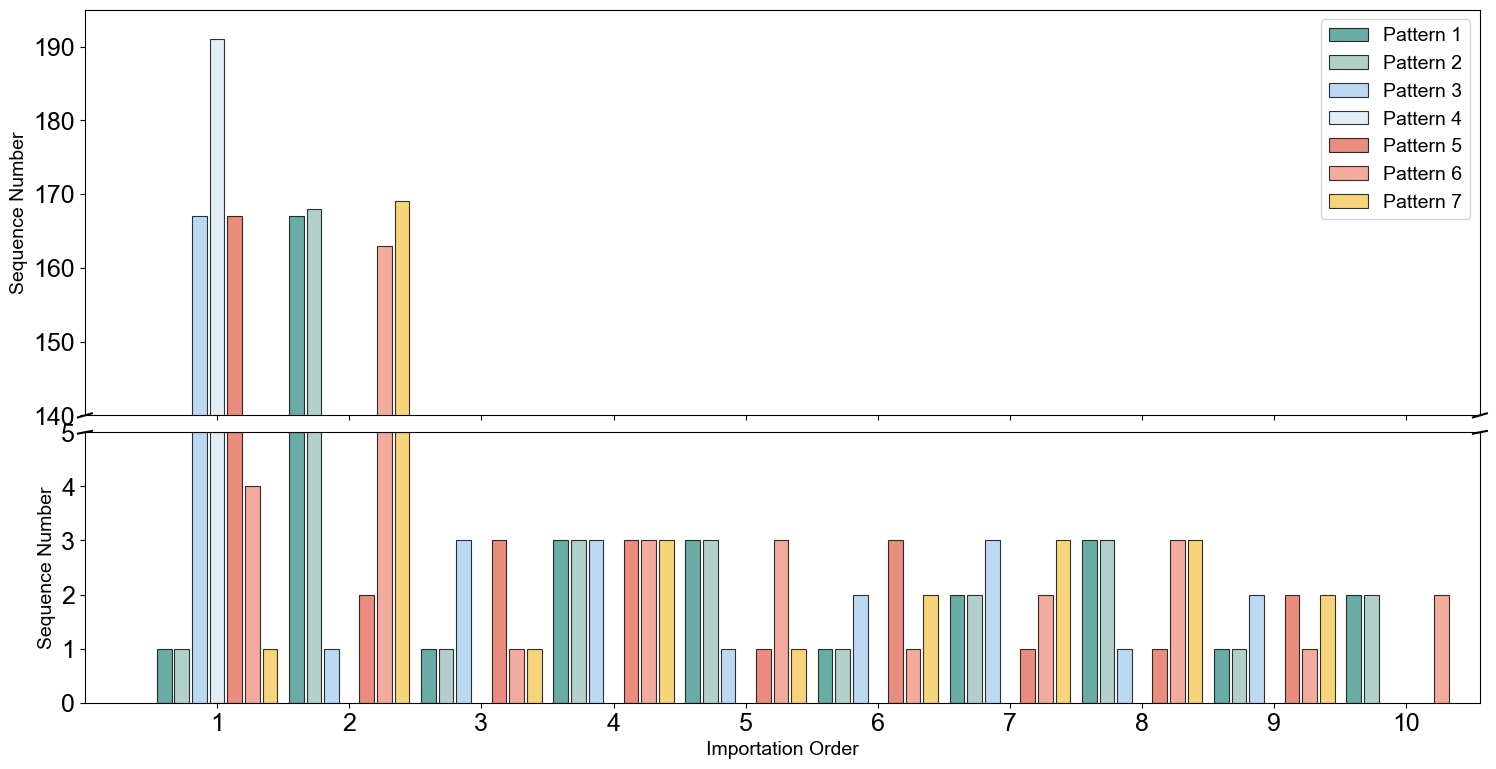

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

df = pd.read_csv('data/importations_numbered_with_seq_num.tsv', sep='\t')

source_patterns = {}
for source in df['source_file'].unique():
    source_data = df[df['source_file'] == source]
    pattern = '_'.join([f"{row['importation_order']}-{row['sequence_num']}" 
                       for _, row in source_data.sort_values('importation_order').iterrows()])
    source_patterns[source] = pattern

pattern_counts = pd.Series(source_patterns).value_counts().reset_index()
pattern_counts.columns = ['pattern', 'count']

total = pattern_counts['count'].sum()
pattern_counts['percentage'] = (pattern_counts['count'] / total * 100).round(2)

top_patterns = pattern_counts.head(10)

def parse_pattern(pattern_str):
    parts = pattern_str.split('_')
    return [tuple(map(int, p.split('-'))) for p in parts]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 9),
                              gridspec_kw={'height_ratios': [3, 2],
                                           'hspace': 0.05})

top_7_patterns = top_patterns.head(7).copy()

pattern_styles = [
    {'label': 'Pattern 1', 'color': '#43978F'},
    {'label': 'Pattern 2', 'color': '#9EC4BE'},
    {'label': 'Pattern 3', 'color': '#ABD0F1'},
    {'label': 'Pattern 4', 'color': '#DCE9F4'},
    {'label': 'Pattern 5', 'color': '#E56F5E'},
    {'label': 'Pattern 6', 'color': '#F19685'},
    {'label': 'Pattern 7', 'color': '#F6C957'}
]

legend_handles = []
legend_labels = []

bar_width = 0.1
x_positions = np.arange(1, 11)
x_positions = x_positions * 0.9

for i, (_, row) in enumerate(top_7_patterns.iterrows()):
    pattern_data = parse_pattern(row['pattern'])
    orders = [p[0] for p in pattern_data]
    seqs = [p[1] for p in pattern_data]
    
    offset = (i - 3) * bar_width * 1.2
    x_pos = x_positions + offset
    
    valid_orders = [o-1 for o in orders if o <= len(x_positions)]
    valid_seqs = [seqs[i] for i in range(len(orders)) if orders[i] <= len(x_positions)]
    
    dummy = ax1.bar(0, 0, bar_width,
                    color=pattern_styles[i]['color'],
                    edgecolor='black',
                    linewidth=0.8,
                    alpha=0.8)
    legend_handles.append(dummy)
    legend_labels.append(pattern_styles[i]['label'])
    
    for seq, pos in zip(valid_seqs, x_pos[valid_orders]):
        if seq > 5 and seq < 160:
            continue
        elif seq >= 160:
            ax1.bar(pos, seq, bar_width, 
                    color=pattern_styles[i]['color'],
                    edgecolor='black',
                    linewidth=0.8,
                    alpha=0.8)
            ax2.bar(pos, 5, bar_width,
                    color=pattern_styles[i]['color'],
                    edgecolor='black',
                    linewidth=0.8,
                    alpha=0.8)
        else:
            ax2.bar(pos, seq, bar_width, 
                    color=pattern_styles[i]['color'],
                    edgecolor='black',
                    linewidth=0.8,
                    alpha=0.8)

ax1.set_ylim(140, 195)
ax2.set_ylim(0, 5)

ax1.set_xlim(0, max(x_positions) + 0.5)
ax2.set_xlim(0, max(x_positions) + 0.5)

ax2.set_xlabel('Importation Order')
ax2.set_ylabel('Sequence Number')
ax1.set_ylabel('Sequence Number')

for ax in [ax1, ax2]:
    ax.set_xticks(x_positions)
    ax.set_xticklabels(range(1, 11))

ax1.set_xticklabels([])

ax1.legend(legend_handles, legend_labels,
           loc='upper right', bbox_to_anchor=(1, 1))

d = .005
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1-d, 1+d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((1-d, 1+d), (1-d, 1+d), **kwargs)
ax1.tick_params(axis='both', labelsize=18)
ax2.tick_params(axis='both', labelsize=18)

plt.tight_layout()
plt.savefig('fig/fig_6_1.pdf', dpi=300, bbox_inches='tight')
plt.savefig('fig/fig_6_1.svg', format='svg', bbox_inches='tight')
plt.show()
